In [6]:
# ! pip install tensorflow
# ! pip install keras
# ! pip install numpy
# ! pip install matplotlip
# ! pip install Pillow
# ! pip install pandas
# ! pip install scikit-learn

In [115]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras import optimizers

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [35]:
train_images = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

In [36]:
# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path, data_folder, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            train_images.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [85]:
print(train_images.shape)

(39209, 30, 30, 3)


In [40]:
# Converting lists into numpy arrays
train_images = np.array(train_images)
labels = np.array(labels)
print(labels)

[ 0  0  0 ... 42 42 42]


In [43]:
# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = train_images.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
train_images = t.reshape(train_images.shape)
print(train_images.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [46]:
# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [47]:
# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [48]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

In [117]:
# Compilation of the model
opt = optimizers.Adam(learning_rate=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.keras')

Epoch 1/15
981/981 [==============================] - 21s 19ms/step - loss: 0.0756 - accuracy: 0.9883 - val_loss: 0.0336 - val_accuracy: 0.9980
Epoch 2/15
981/981 [==============================] - 18s 18ms/step - loss: 0.0849 - accuracy: 0.9872 - val_loss: 0.0417 - val_accuracy: 0.9973
Epoch 3/15
981/981 [==============================] - 18s 18ms/step - loss: 0.0613 - accuracy: 0.9893 - val_loss: 0.0388 - val_accuracy: 0.9967
Epoch 4/15
981/981 [==============================] - 20s 20ms/step - loss: 0.0664 - accuracy: 0.9881 - val_loss: 0.0408 - val_accuracy: 0.9972
Epoch 5/15
981/981 [==============================] - 18s 18ms/step - loss: 0.0654 - accuracy: 0.9872 - val_loss: 0.0400 - val_accuracy: 0.9973
Epoch 6/15
981/981 [==============================] - 18s 19ms/step - loss: 0.0707 - accuracy: 0.9879 - val_loss: 0.0475 - val_accuracy: 0.9954
Epoch 7/15
981/981 [==============================] - 17s 18ms/step - loss: 0.0845 - accuracy: 0.9863 - val_loss: 0.0407 - val_accuracy:

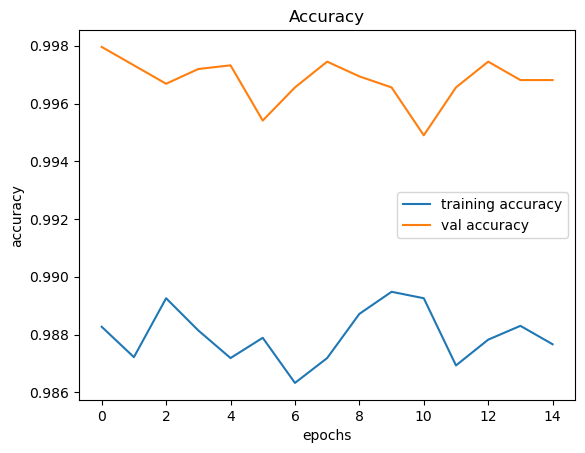

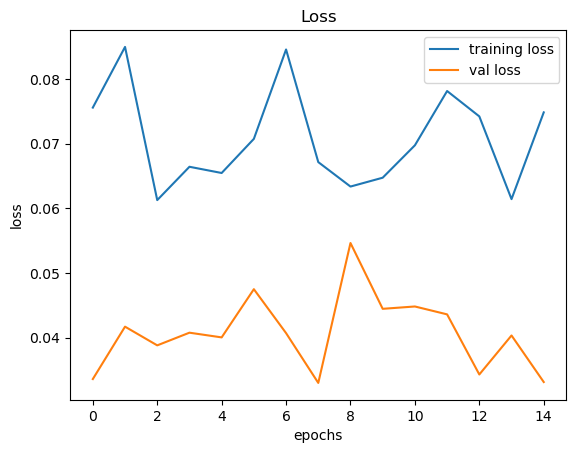

In [118]:
# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [119]:
# Testing the model
data_path = os.path.join(cur_path, data_folder)
y_test = pd.read_csv(data_folder + '\\' + 'Test.csv')
test_labels = y_test["ClassId"].values
test_imgs_path = y_test["Path"].values

test_data = []

for img in test_imgs:
    image = Image.open(data_path + '\\' + img)
    image = image.resize((30, 30))
    test_data.append(np.array(image))

X_test = np.array(test_data)

In [120]:
print(test_labels)

[16  1 38 ...  6  7 10]


In [121]:
# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)


In [122]:
# Predicting on test set
pred = np.argmax(model.predict(X_test), axis=1)
print(pred)

395/395 [==============================] - 2s 5ms/step
[16  1 38 ...  3  7 10]


In [123]:
# Performance evaluation
cm = confusion_matrix(test_labels, pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[ 60   0   0 ...   0   0   0]
 [  0 714   2 ...   1   0   0]
 [  0  11 732 ...   0   0   0]
 ...
 [  0   0   0 ...  87   0   0]
 [  0   0   0 ...   0  56   0]
 [  0   0   0 ...   0   0  88]]


In [124]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, pred, average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.973872
Precision: 0.966230
Recall: 0.962470
F1 score: 0.963737


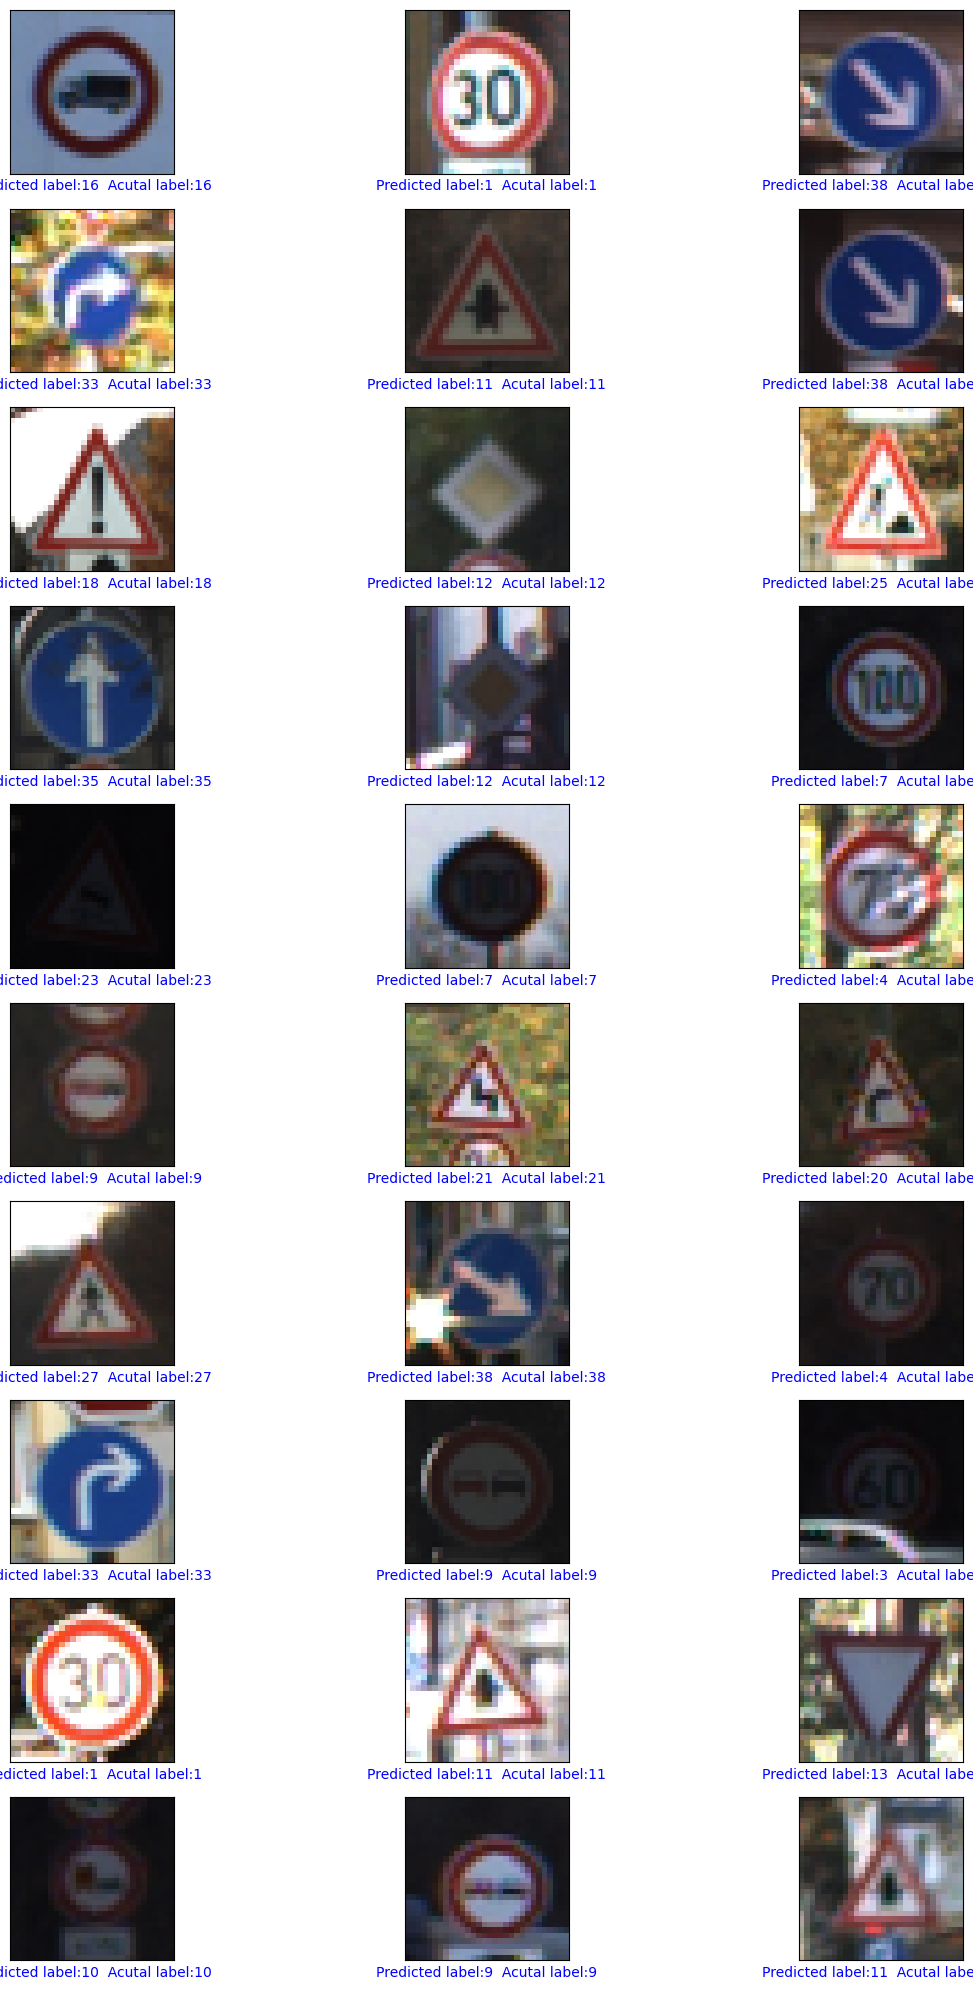

In [125]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
def plot_image(i,predicted_label , true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Predicted label:{}  Acutal label:{}".format(predicted_label,
                                    true_label),
                                    color=color)

num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred[i], test_labels, X_test)
plt.tight_layout()
plt.show()

In [126]:
# Rebuilding the model by changing epochs
opt = optimizers.Adam(learning_rate=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier_2.keras')

Epoch 1/20
981/981 [==============================] - 19s 19ms/step - loss: 0.0696 - accuracy: 0.9890 - val_loss: 0.0366 - val_accuracy: 0.9964
Epoch 2/20
981/981 [==============================] - 19s 19ms/step - loss: 0.0734 - accuracy: 0.9878 - val_loss: 0.0360 - val_accuracy: 0.9966
Epoch 3/20
981/981 [==============================] - 19s 20ms/step - loss: 0.0625 - accuracy: 0.9901 - val_loss: 0.0388 - val_accuracy: 0.9963
Epoch 4/20
981/981 [==============================] - 18s 19ms/step - loss: 0.0760 - accuracy: 0.9878 - val_loss: 0.0485 - val_accuracy: 0.9972
Epoch 5/20
981/981 [==============================] - 18s 19ms/step - loss: 0.0715 - accuracy: 0.9887 - val_loss: 0.0430 - val_accuracy: 0.9959
Epoch 6/20
981/981 [==============================] - 18s 19ms/step - loss: 0.0735 - accuracy: 0.9878 - val_loss: 0.0394 - val_accuracy: 0.9957
Epoch 7/20
981/981 [==============================] - 18s 19ms/step - loss: 0.0653 - accuracy: 0.9888 - val_loss: 0.0417 - val_accuracy:

In [127]:
# Predicting on test set
pred2 = np.argmax(model.predict(X_test), axis=1)

# Performance evaluation
cm = confusion_matrix(test_labels, pred2)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, pred2)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, pred2, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, pred2, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, pred2, average='macro')
print('F1 score: %f' % f1)

395/395 [==============================] - 3s 6ms/step
Confusion Matrix:
[[ 60   0   0 ...   0   0   0]
 [  0 715   0 ...   0   0   0]
 [  0   6 742 ...   0   0   0]
 ...
 [  0   0   0 ...  86   0   0]
 [  0   0   0 ...   0  50   0]
 [  0   0   0 ...   0   0  89]]
Accuracy: 0.977118
Precision: 0.970320
Recall: 0.960511
F1 score: 0.963823


In [128]:
# Rebuilding the model by changing batch size
opt = optimizers.Adam(learning_rate=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier_3.keras')

Epoch 1/15
491/491 [==============================] - 125s 252ms/step - loss: 0.0631 - accuracy: 0.9908 - val_loss: 0.0449 - val_accuracy: 0.9967
Epoch 2/15
491/491 [==============================] - 16s 33ms/step - loss: 0.0584 - accuracy: 0.9910 - val_loss: 0.0444 - val_accuracy: 0.9973
Epoch 3/15
491/491 [==============================] - 14s 29ms/step - loss: 0.0614 - accuracy: 0.9913 - val_loss: 0.0472 - val_accuracy: 0.9966
Epoch 4/15
491/491 [==============================] - 15s 30ms/step - loss: 0.0615 - accuracy: 0.9907 - val_loss: 0.0473 - val_accuracy: 0.9976
Epoch 5/15
491/491 [==============================] - 15s 30ms/step - loss: 0.0565 - accuracy: 0.9915 - val_loss: 0.0393 - val_accuracy: 0.9976
Epoch 6/15
491/491 [==============================] - 14s 29ms/step - loss: 0.0347 - accuracy: 0.9939 - val_loss: 0.0469 - val_accuracy: 0.9976
Epoch 7/15
491/491 [==============================] - 14s 29ms/step - loss: 0.0572 - accuracy: 0.9911 - val_loss: 0.0428 - val_accurac

In [129]:
# Predicting on test set
pred3 = np.argmax(model.predict(X_test), axis=1)

# Performance evaluation
cm = confusion_matrix(test_labels, pred3)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, pred3)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, pred3, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, pred3, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, pred3, average='macro')
print('F1 score: %f' % f1)

395/395 [==============================] - 2s 5ms/step
Confusion Matrix:
[[ 60   0   0 ...   0   0   0]
 [  0 715   2 ...   0   0   0]
 [  0   3 742 ...   0   0   0]
 ...
 [  0   0   0 ...  88   0   0]
 [  0   0   0 ...   0  54   0]
 [  0   0   0 ...   0   0  90]]
Accuracy: 0.972130
Precision: 0.965103
Recall: 0.954116
F1 score: 0.958311


In [130]:
# Rebuilding the model by changing learning rate
opt = optimizers.Adam(learning_rate=2e-3)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier_4.keras')

Epoch 1/15
491/491 [==============================] - 16s 32ms/step - loss: 0.1091 - accuracy: 0.9856 - val_loss: 0.0546 - val_accuracy: 0.9957
Epoch 2/15
491/491 [==============================] - 14s 29ms/step - loss: 0.1242 - accuracy: 0.9847 - val_loss: 0.0423 - val_accuracy: 0.9966
Epoch 3/15
491/491 [==============================] - 14s 29ms/step - loss: 0.1112 - accuracy: 0.9829 - val_loss: 0.0546 - val_accuracy: 0.9969
Epoch 4/15
491/491 [==============================] - 14s 29ms/step - loss: 0.1210 - accuracy: 0.9842 - val_loss: 0.0445 - val_accuracy: 0.9957
Epoch 5/15
491/491 [==============================] - 15s 30ms/step - loss: 0.1320 - accuracy: 0.9826 - val_loss: 0.0432 - val_accuracy: 0.9969
Epoch 6/15
491/491 [==============================] - 16s 32ms/step - loss: 0.1385 - accuracy: 0.9823 - val_loss: 0.0467 - val_accuracy: 0.9945
Epoch 7/15
491/491 [==============================] - 15s 31ms/step - loss: 0.1154 - accuracy: 0.9825 - val_loss: 0.0573 - val_accuracy:

In [131]:
# Predicting on test set
pred4 = np.argmax(model.predict(X_test), axis=1)

# Performance evaluation
cm = confusion_matrix(test_labels, pred4)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, pred4)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, pred4, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, pred4, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, pred4, average='macro')
print('F1 score: %f' % f1)

395/395 [==============================] - 2s 5ms/step
Confusion Matrix:
[[ 60   0   0 ...   0   0   0]
 [  0 707   3 ...   0   0   0]
 [  0  10 725 ...   0   0   0]
 ...
 [  0   0   0 ...  89   0   0]
 [  0   0   0 ...   0  54   0]
 [  0   0   0 ...   0   0  89]]
Accuracy: 0.967775
Precision: 0.958028
Recall: 0.952839
F1 score: 0.953194
